# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### A. Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.35$ and a fixed random state = $42$.
2. Fit and visualize a decision tree classifier. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler

In [51]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [52]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

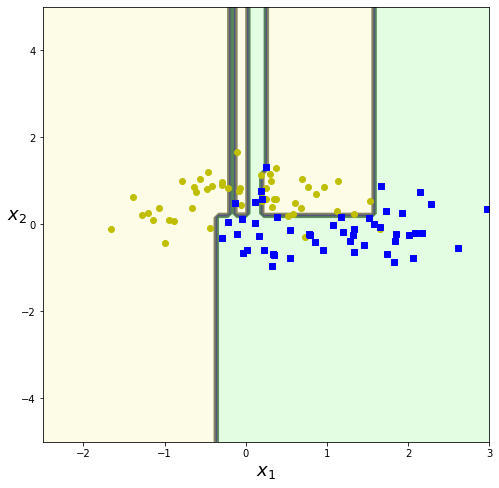

In [57]:
data = datasets.make_moons(n_samples=100,noise=0.35,random_state=42)
X = data[0]
Y = data[1]
model = DecisionTreeClassifier().fit(X,Y)
plt.figure(figsize=[8,8])
plot_decision_boundary(model,X,Y,axes=[-2.5,3,-5,5])

#### Q. Comment on the overfitting nature of the Decision trees

Due to no restrictions is number of depth, its overfitting heavily by trying to classify every point correctly.

### B. Overfitting in decision tree classifiers

1. List and explain in a few lines, three of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
2. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 
3. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $5$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 

Regularization hyperparams: 
1. Max number of depth: Limits the level till which decsion trees can go. If not set it will try to force decision boundary to classify every point correctly. 
2. Min samples fit: Specifies the minimum number of samples required to split an internal node. 
3. Min samples leaf: Specifies the minimum number of samples required to be at a leaf node. 
Icreasing min_samples_leaf and min_samples will add regularizing as it kinda lossens the complexity of the model by telling, "Hey if less than this value, don't consider splitting".

Model with min_samples_leaf = 4 and max_depth = 5 will generalize better to test set as it does not overfit which is evident from the images below (low number of sub-branches)

# Min leaf = 4

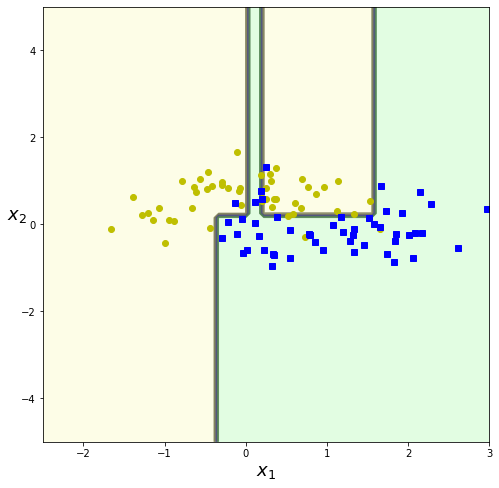

In [28]:
data = datasets.make_moons(n_samples=100,noise=0.35,random_state=42)
X = data[0]
Y = data[1]
model = DecisionTreeClassifier(min_samples_leaf=4).fit(X,Y)
plt.figure(figsize=[8,8])
plot_decision_boundary(model,X,Y,axes=[-2.5,3,-5,5])

# Depth = 5

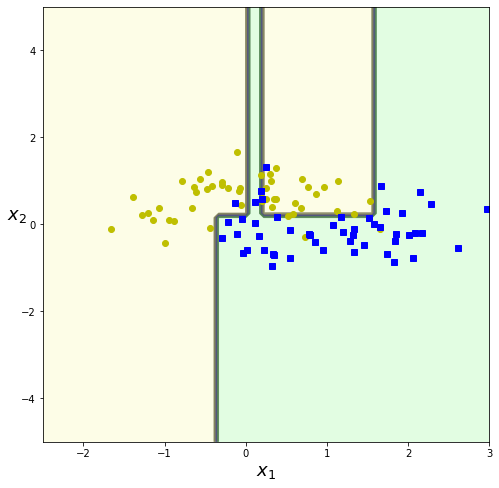

In [20]:
data = datasets.make_moons(n_samples=100,noise=0.35,random_state=42)
X = data[0]
Y = data[1]
model = DecisionTreeClassifier(max_depth=5).fit(X,Y)
plt.figure(figsize=[8,8])
plot_decision_boundary(model,X,Y,axes=[-2.5,3,-5,5])

#### Q. Comment on the boundary surface of the decision tree. 
Hint: Observe the orthogonality of the boundary

Decision boundary of a decision tree is determined by overlapping orthogonal half-planes (representing the result of each subsequent decision) and can end up as displayed as above.

### C. Linear classifiers vs decision tree classifiers

In [29]:
#Generate 100 points [x1, x2] in the 2D plane using np.random.rand() for -0.5<x1<0.5 and -0.5<x2<0.5
x = np.random.rand(100,2) - 0.5
y = np.zeros(100)
#Assign a label of 1 to all points having x1>0.0 and 0 otherwise
y[x[:,0]>0] = 1
#Rotate the dataset by 45 degrees in the [x1,x2] plane
rot = [[0.414,-0.414],[0.414,0.414]]
x_rot = np.matmul(rot,x.T)
x_rot = x_rot.T

1. Fit a linear Logistic Regression model and Decision Tree on the x_rot
2. Fit a linear Logistic Regression model and Decision tree on the make_moons dataset generated in A(1)


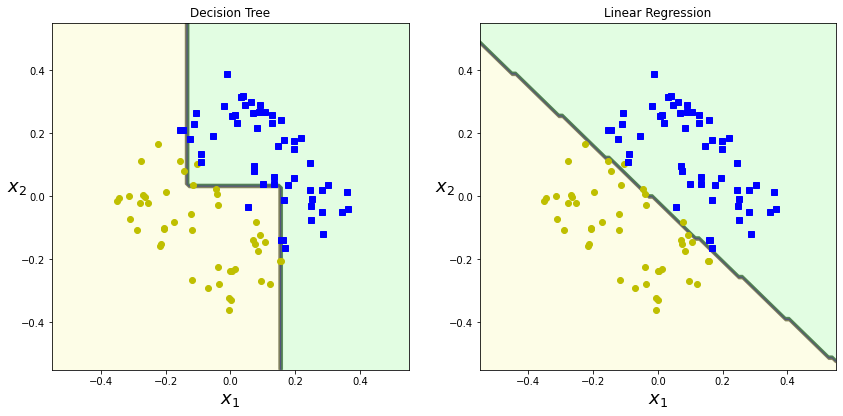

In [65]:
#Answer here
model = DecisionTreeClassifier(min_samples_leaf=4,max_depth=5).fit(x_rot,y)
plt.figure(figsize=[60,60])
plt.subplot(8,8,1)
plt.title("Decision Tree")
plot_decision_boundary(model,x_rot,y,axes=[-0.55,0.55,-0.55,0.55])

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_rot,y)
plt.subplot(8,8,2)
plt.title("Linear Regression")
plot_decision_boundary(model,x_rot,y,axes=[-0.55,0.55,-0.55,0.55])

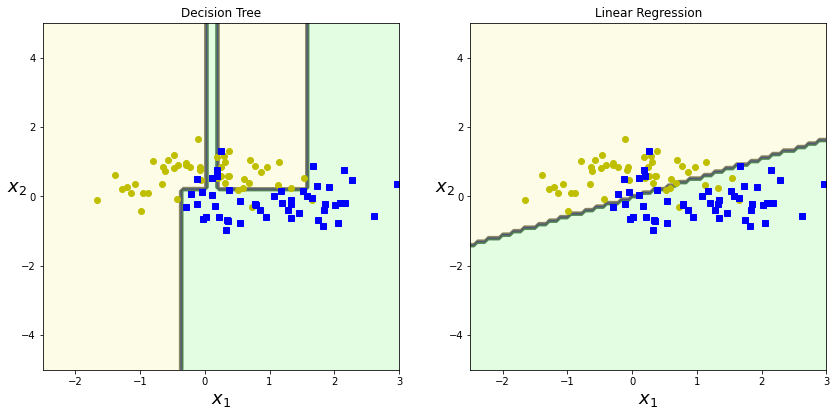

In [67]:
#Answer here
#Answer here
model = DecisionTreeClassifier(min_samples_leaf=4,max_depth=5).fit(X,Y)
plt.figure(figsize=[60,60])
plt.subplot(8,8,1)
plt.title("Decision Tree")
plot_decision_boundary(model,X,Y,axes=[-2.5,3,-5,5])

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,Y)
plt.subplot(8,8,2)
plt.title("Linear Regression")
plot_decision_boundary(model,X,Y,axes=[-2.5,3,-5,5])

#### Q. Compare the performance of Decision Trees and logistic regression on the two datasets

When the data is easily separable by a single straight line, both decision trees and linear regression perform the same. But when the structure of the data is complex, decision trees does a much better job. This is expected, as the decision tree in itself is a complex way of classifying due the presence of multiple conditions as compared to simple linear regression which is essence is just a single condition.

### D. Regression using decision trees

1. Train a regression tree on the noisy sine dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

In [108]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -1, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Sine + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = np.sin(2*np.pi*X) + np.random.randn(150, 1) / 10

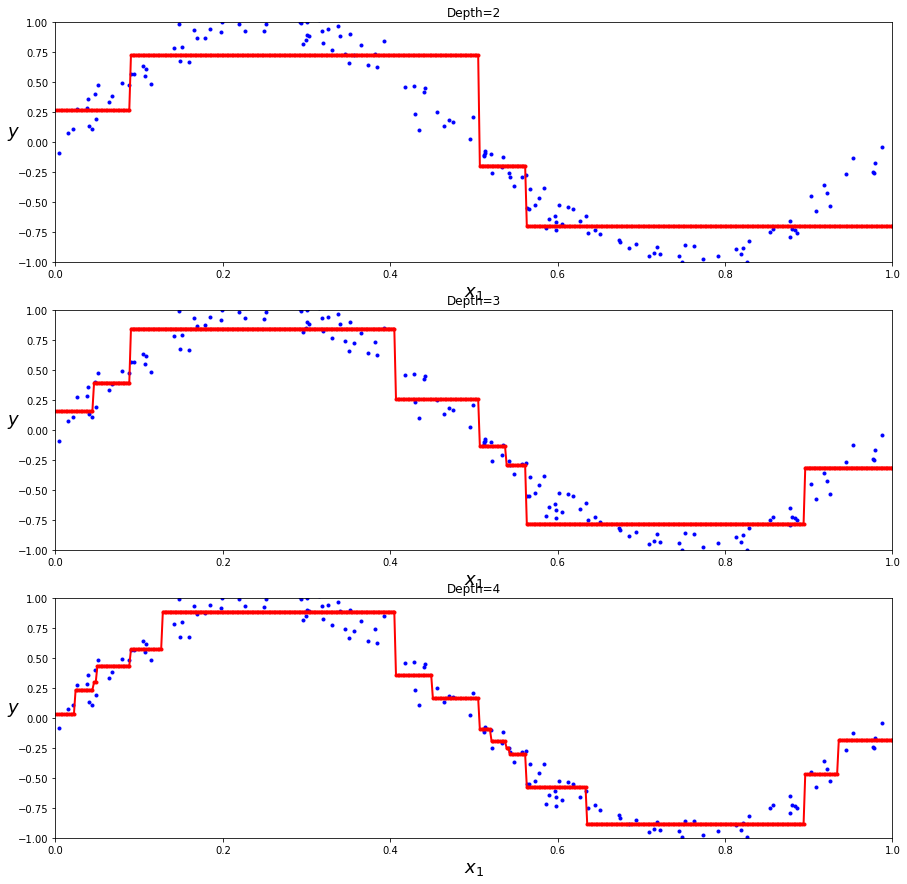

In [112]:
#Answer here
from sklearn.tree import DecisionTreeRegressor
plt.figure(figsize=[15,15])
for i in range(3):
    model = DecisionTreeRegressor(max_depth=i+2).fit(X,y)
    plt.subplot(3,1,i+1)
    plot_regression_predictions(model,X,y)
    plt.title("Depth="+str(i+2))

### E. Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 

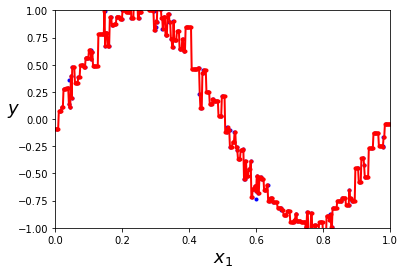

In [113]:
#Answer here
model = DecisionTreeRegressor().fit(X,y)
plot_regression_predictions(model,X,y)

Regression trees are heavily overfitting the data. Yes, they too have tendencies like decision trees to overfit if no regularization is applied

### F. Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.5$). Random seed = 42 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $35$ for max_leaf_nodes and $2$ to $10$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [121]:
#Answer here

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
data = datasets.make_moons(n_samples=10000,noise=0.5,random_state=42)
X = data[0]
Y = data[1]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)

parameters = {'max_leaf_nodes':[i for i in range(2,36)],'min_samples_split':[i for i in range(2,11)]}
model = DecisionTreeClassifier()
best_model = GridSearchCV(model,parameters).fit(X_train,Y_train)

In [122]:
print(best_model.best_params_)
y_pred = best_model.predict(X_test)
f1 = f1_score(Y_test,y_pred,average="weighted")
print("Best F1 score: {}".format(f1))
acc = accuracy_score(Y_test,y_pred)
print("Best accuracy score: {}".format(acc))
#Confusion matrix
con_mat = confusion_matrix(Y_test,y_pred)
print("Best Confusion matrix\n:{}".format(con_mat))

{'max_leaf_nodes': 12, 'min_samples_split': 2}
Best F1 score: 0.8187311852492354
Best accuracy score: 0.819
Best Confusion matrix
:[[791 234]
 [128 847]]


### G. Training the Random Forest model
1. Load the loans dataset and use one-hot encoding for the column 'purpose'
2. Split the data into test and train sets with ratio 70:30 with random seed = 101
3. Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.
4. Predict the class of not.fully.paid for the X_test data
5. Now create a classification report from the results. Do you get anything strange or some sort of warning?

In [185]:
#Answer here
import pandas as pd

In [186]:
loan = pd.read_csv("loan_data.csv")
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [187]:
y = np.array(loan)[:,-1]

In [189]:
loan = loan.drop(columns = "not.fully.paid")

In [190]:
dum = pd.get_dummies(loan)
df = pd.concat([loan, dum], axis=1) 
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,0,1,0,0,1,0,0,0,0,0


In [191]:
df = df.drop(columns = "purpose")

In [192]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,...,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,...,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,...,0,1,0,0,1,0,0,0,0,0


In [194]:
X = np.array(df)

In [255]:
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [264]:
model = DecisionTreeRegressor().fit(X_train,Y_train)
Y_test = Y_test.astype(int)

In [265]:
y_pred = model.predict(X_test).astype(int)

In [266]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_pred.round(), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.84      0.84      2408
     class 1       0.20      0.21      0.21       466

    accuracy                           0.74      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.74      0.74      0.74      2874

